In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Dataset

In [34]:
df = pd.read_csv('aug_train.csv')

df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16155,29745,city_90,0.698,NaN,No relevent experience,Part time course,Graduate,STEM,7,NaN,NaN,1,22,1.0
18804,24992,city_97,0.925,Male,Has relevent experience,no_enrollment,Masters,STEM,8,100-500,NaN,1,73,0.0
4025,17053,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,1,206,0.0
250,6685,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,NaN,NaN,>4,47,0.0
11331,29056,city_115,0.789,Male,Has relevent experience,Full time course,Graduate,STEM,10,<10,Early Stage Startup,1,77,1.0
6547,20908,city_61,0.913,NaN,No relevent experience,Full time course,Masters,STEM,13,5000-9999,Public Sector,2,6,0.0
18291,10852,city_14,0.698,NaN,No relevent experience,no_enrollment,Graduate,Humanities,2,5000-9999,Public Sector,1,96,1.0
13201,31603,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,1,10,0.0
929,23328,city_90,0.698,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,45,1.0
16015,28850,city_98,0.949,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,>4,77,0.0


In [35]:
df.shape

(19158, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [37]:
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [38]:
df[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [39]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [40]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [41]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23288\3050400788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

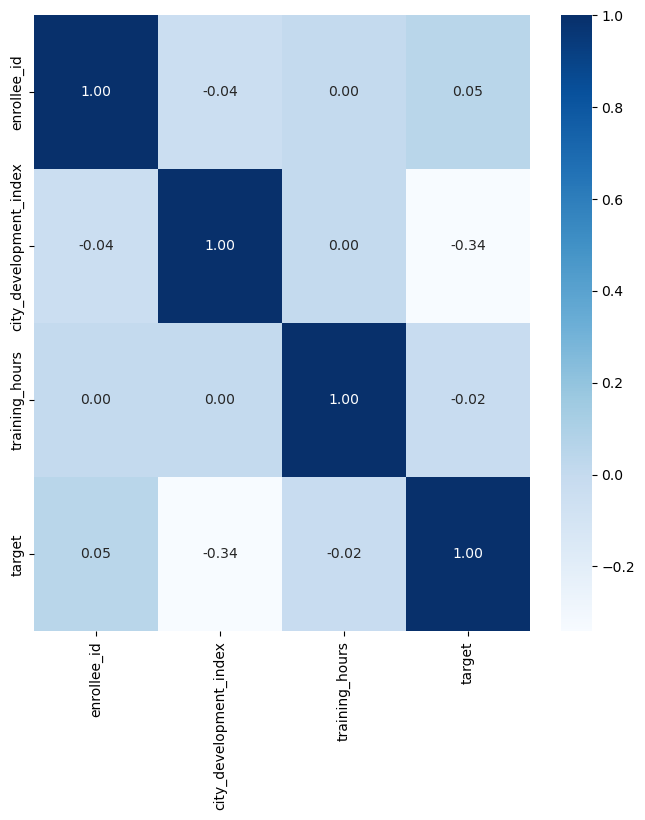

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# Data Distribution and Visualization

### Data Numerical

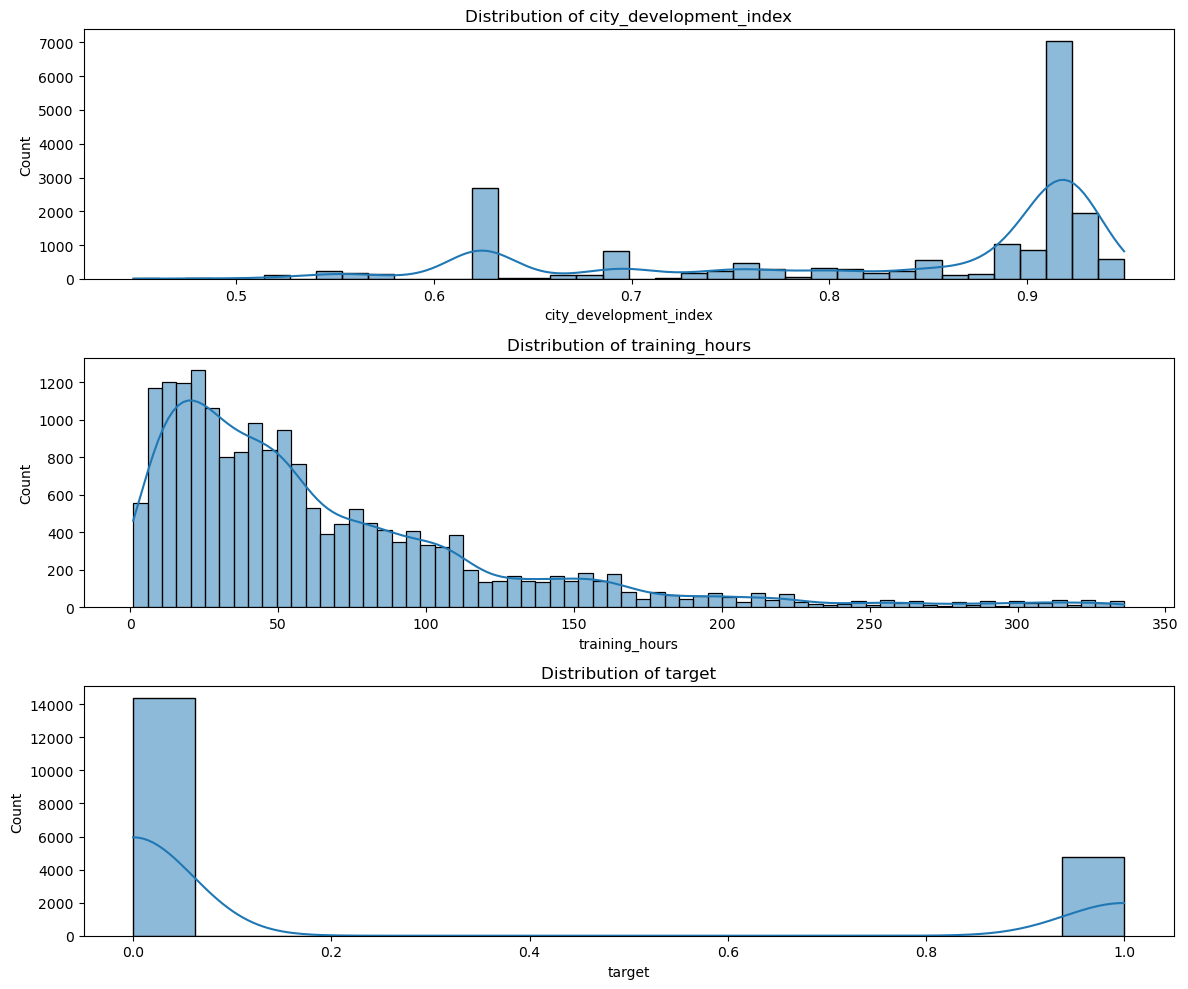

In [43]:
# Select the numerical features
numerical_features = ['city_development_index', 'training_hours', 'target']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numerical features and plot histograms/density plots
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Data Categorical

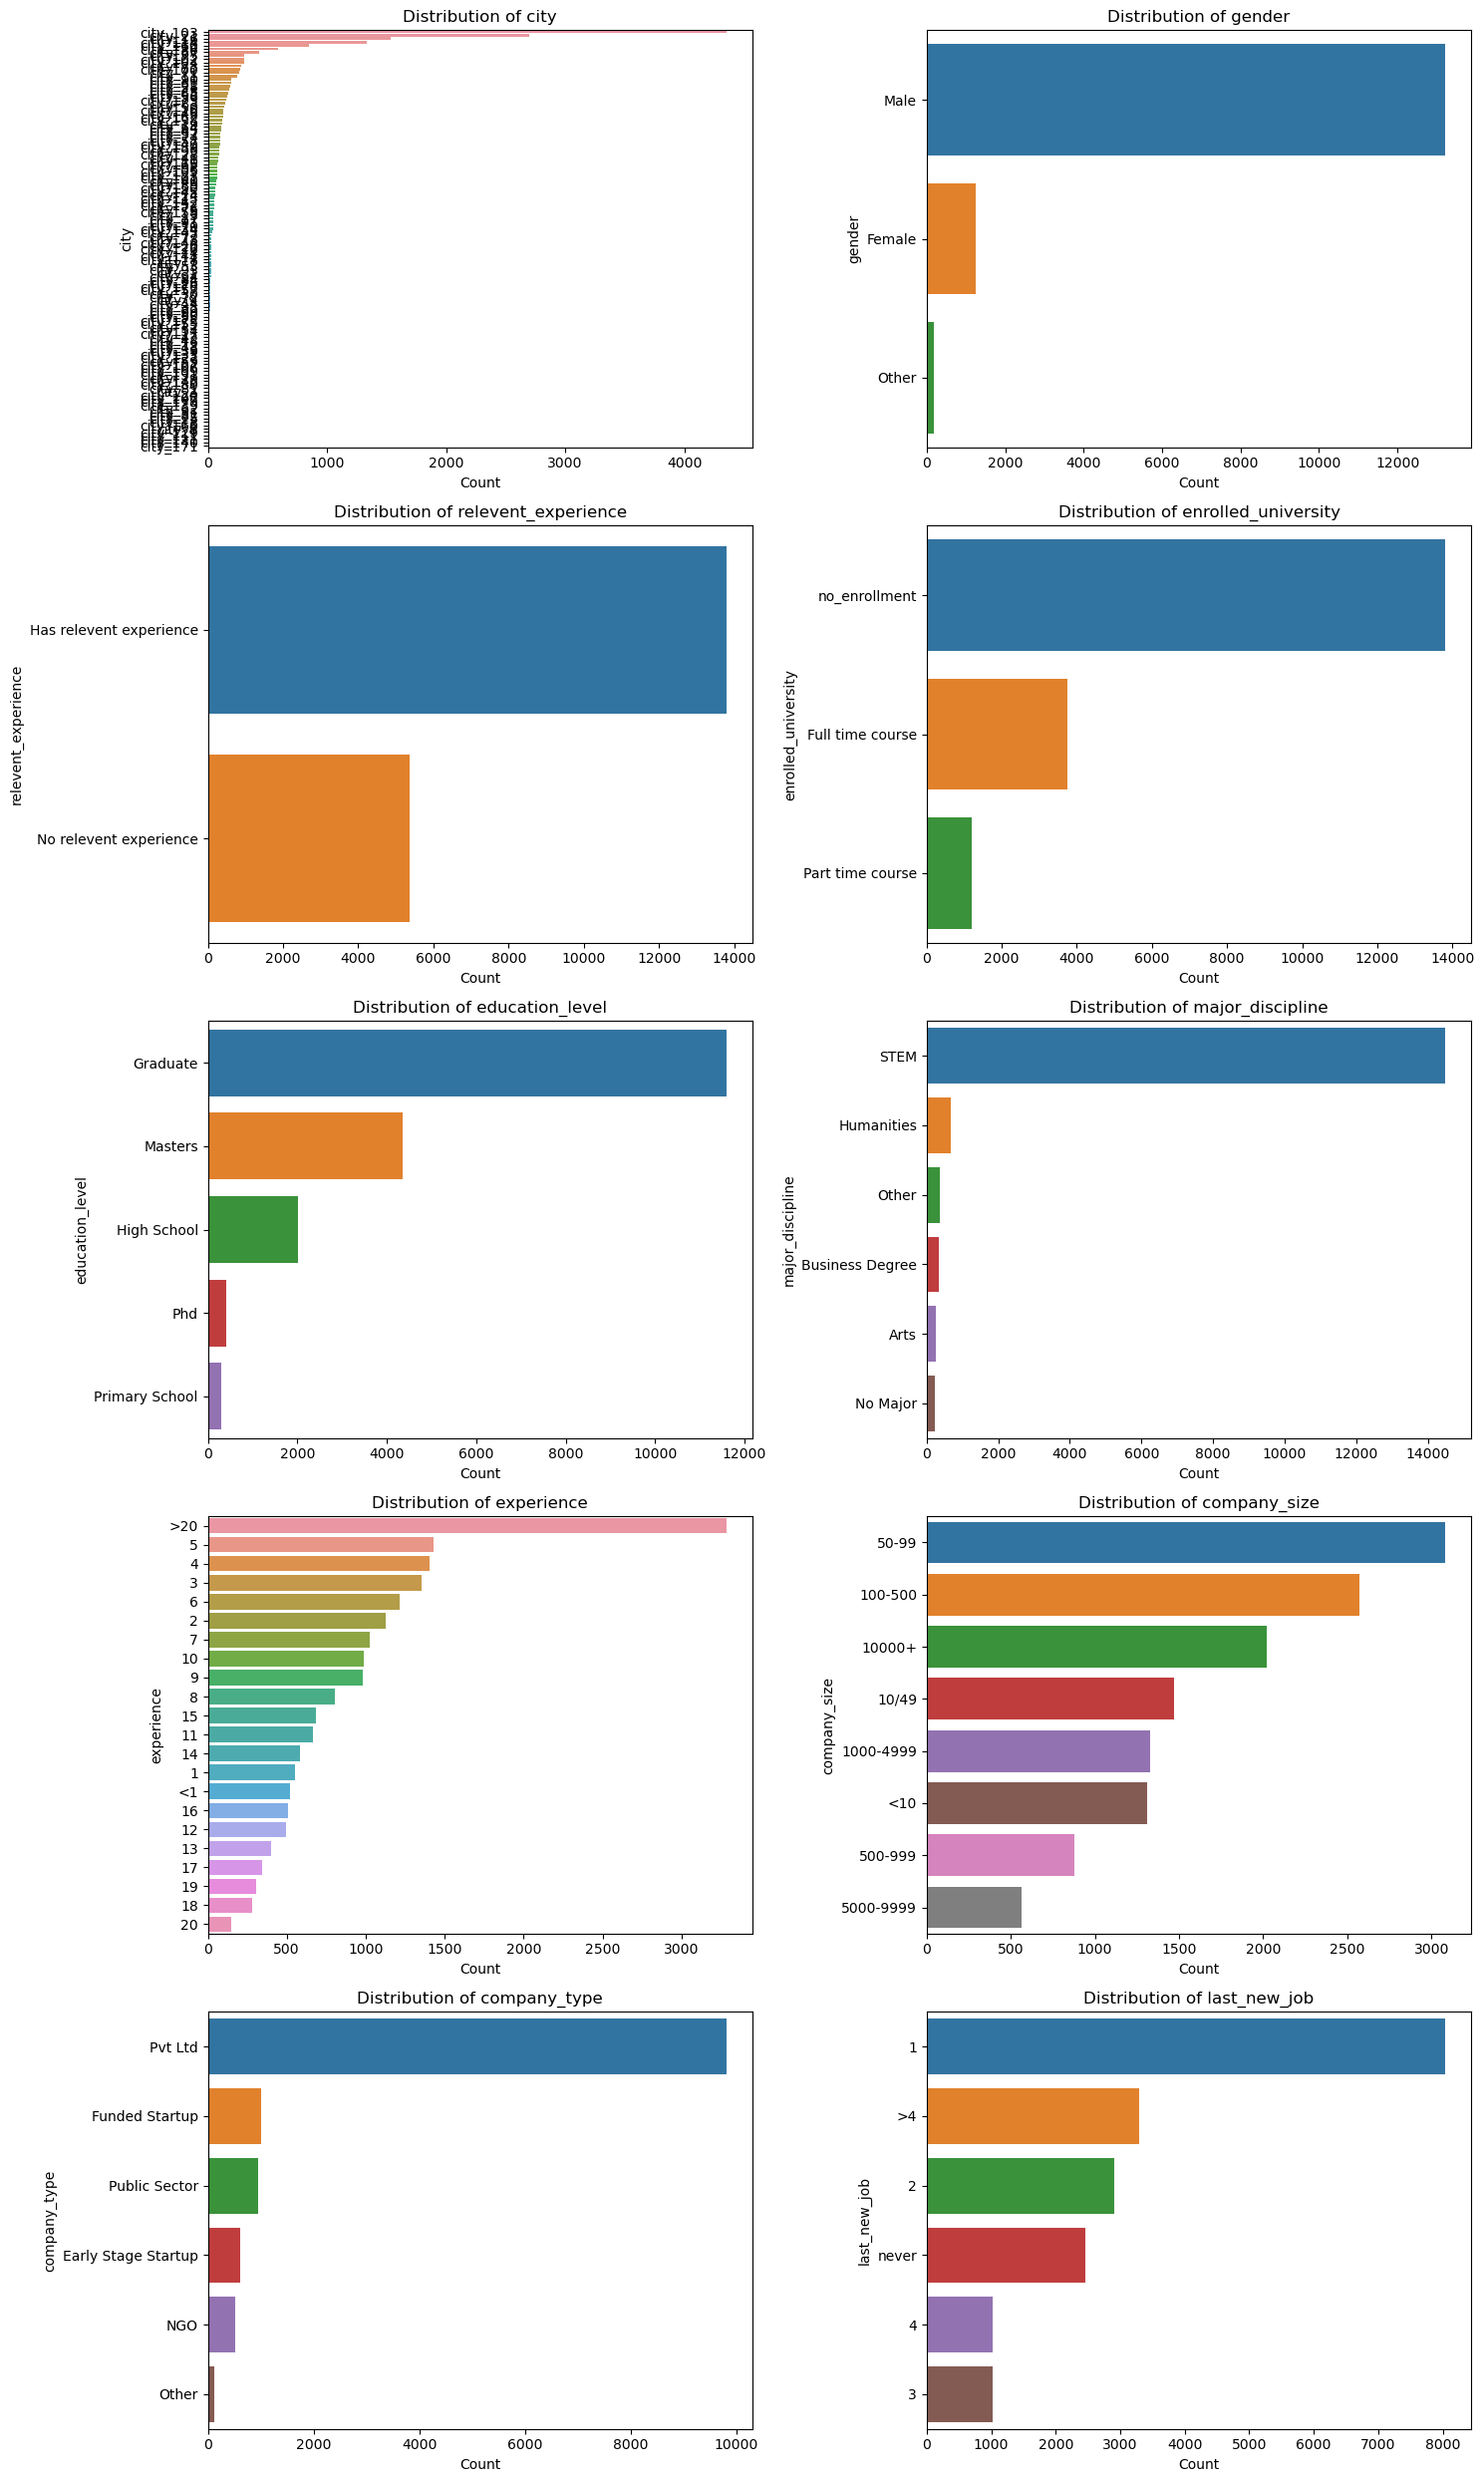

In [44]:
# Select the categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 'company_size',
                        'company_type', 'last_new_job']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical features and plot bar charts
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, y=feature, ax=axes[i], order=df[feature].value_counts().index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Missing Values

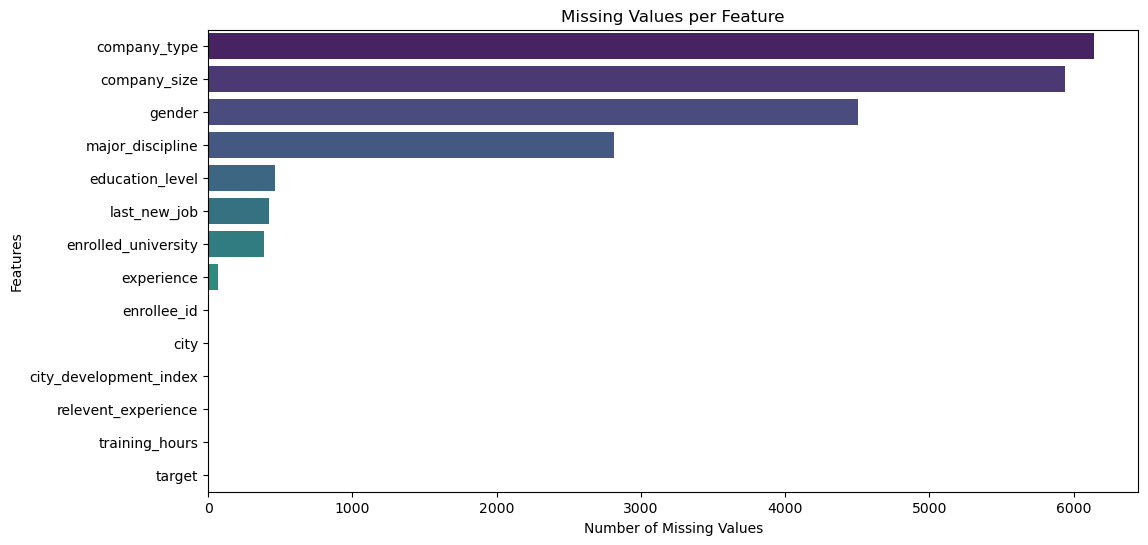

In [45]:
# Calculate missing values per feature
missing_values = df.isnull().sum()

# Create a DataFrame to store the missing value counts
missing_df = pd.DataFrame({'feature': missing_values.index, 'count': missing_values.values})

# Sort the DataFrame by the missing value count
missing_df = missing_df.sort_values(by='count', ascending=False)

# Plot the missing values using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='feature', data=missing_df, palette='viridis')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.title('Missing Values per Feature')
plt.show()

## Correlation

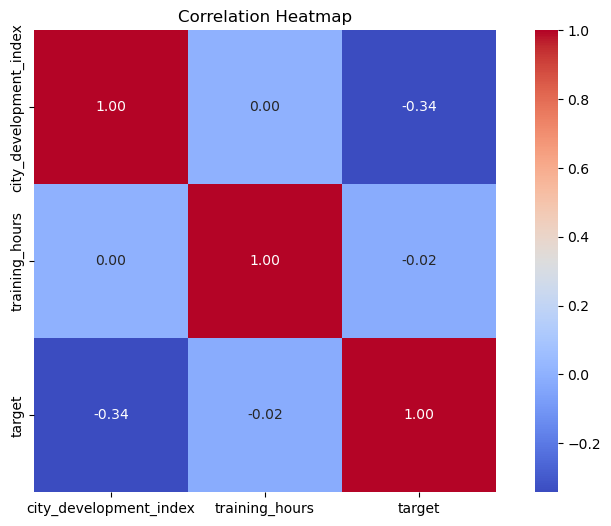

In [47]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']

# Subset the DataFrame with only the numerical features
numerical_df = df[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Gender Distribution

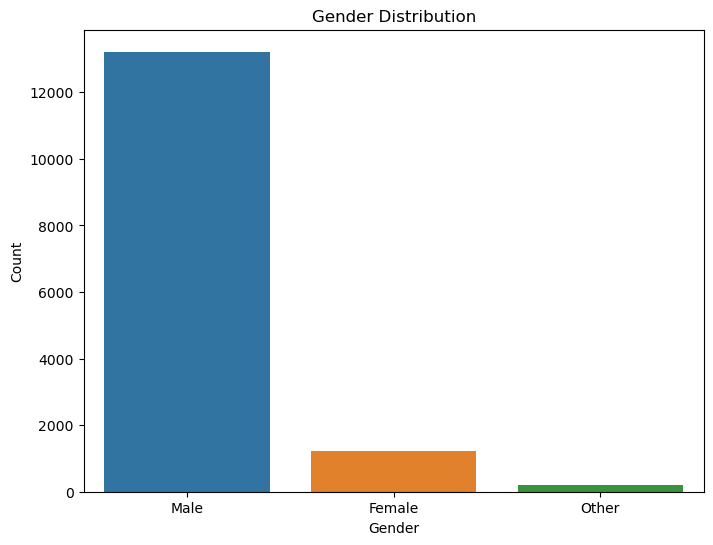

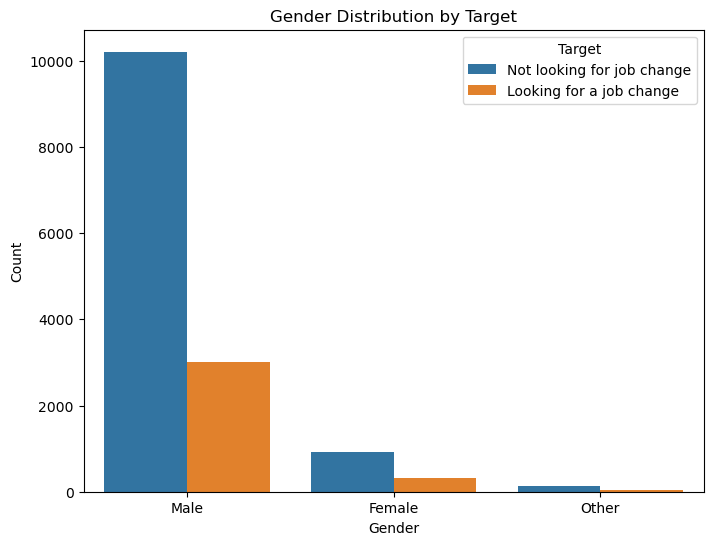

In [48]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot gender distribution with respect to target
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='target', data=df)
plt.title('Gender Distribution by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Not looking for job change', 'Looking for a job change'])
plt.show()

## Experience and Last New Job

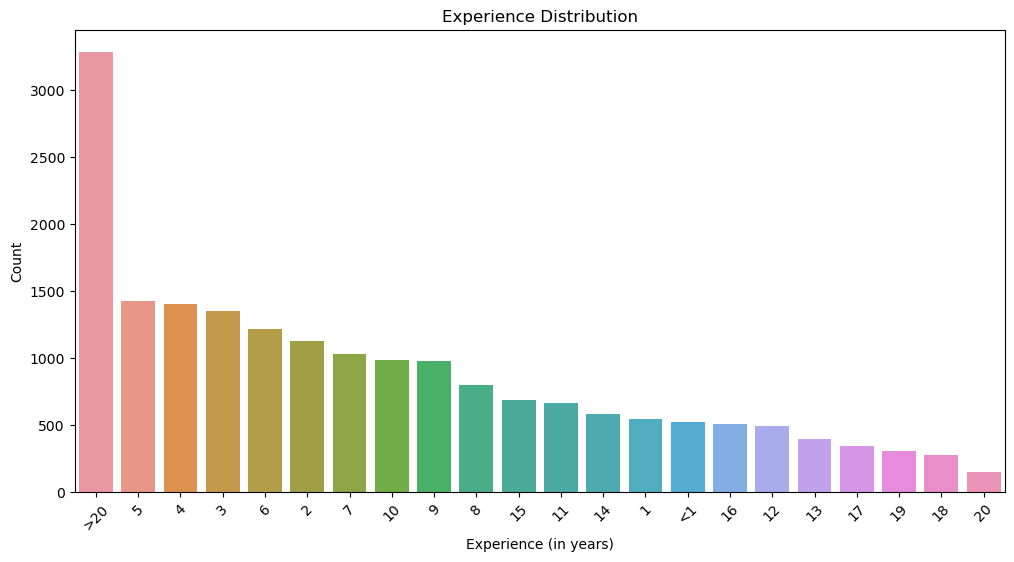

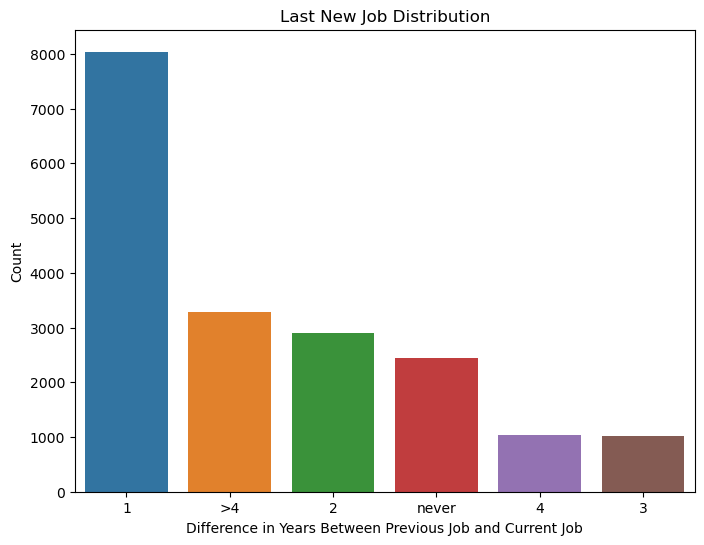

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='experience', data=df, order=df['experience'].value_counts().index)
plt.title('Experience Distribution')
plt.xlabel('Experience (in years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot last_new_job distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='last_new_job', data=df, order=df['last_new_job'].value_counts().index)
plt.title('Last New Job Distribution')
plt.xlabel('Difference in Years Between Previous Job and Current Job')
plt.ylabel('Count')
plt.show()

## Company Size and Type

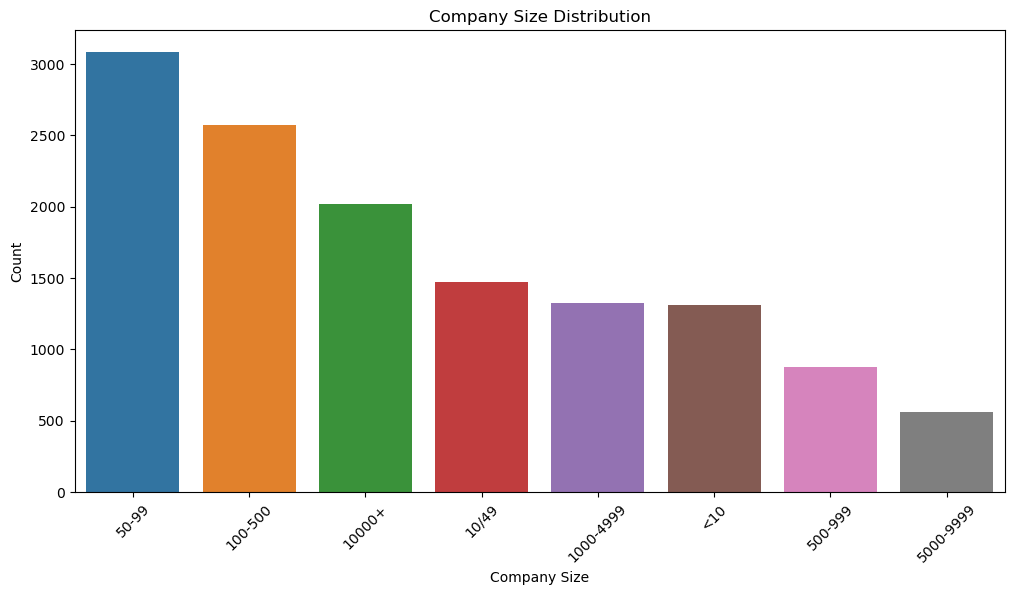

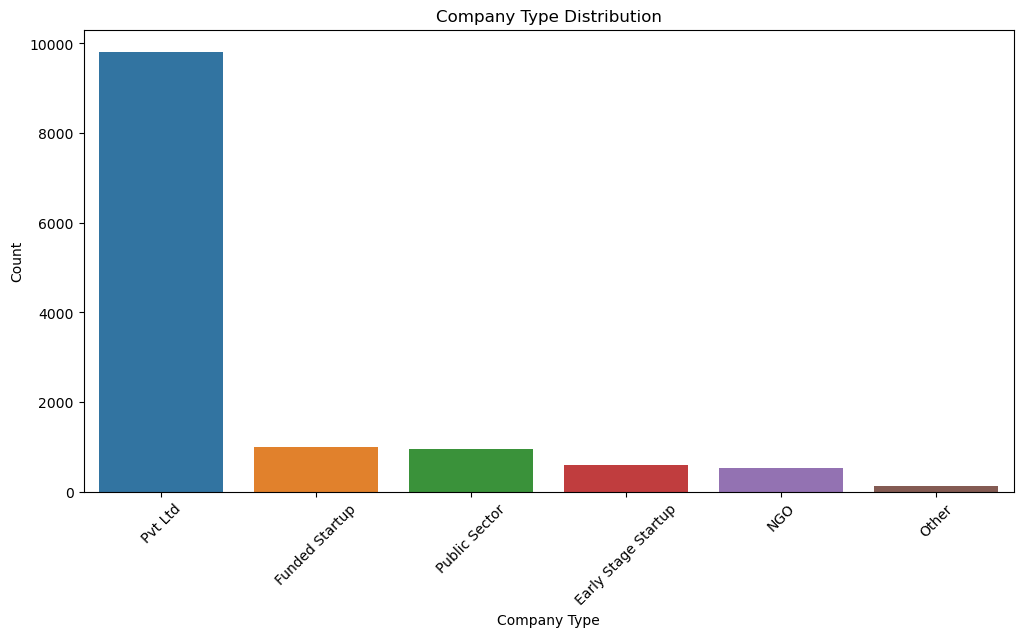

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', data=df, order=df['company_size'].value_counts().index)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot company type distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='company_type', data=df, order=df['company_type'].value_counts().index)
plt.title('Company Type Distribution')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Training Hours

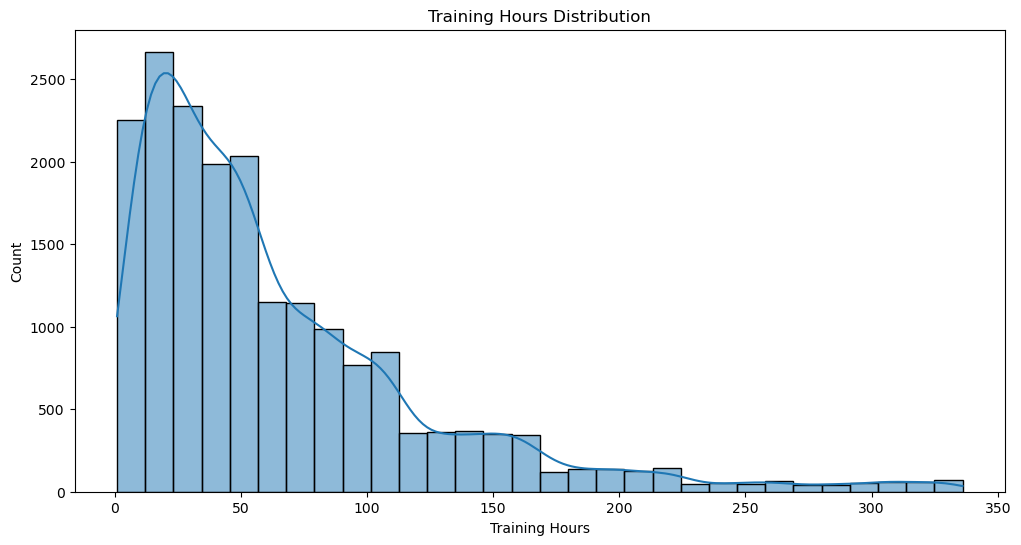

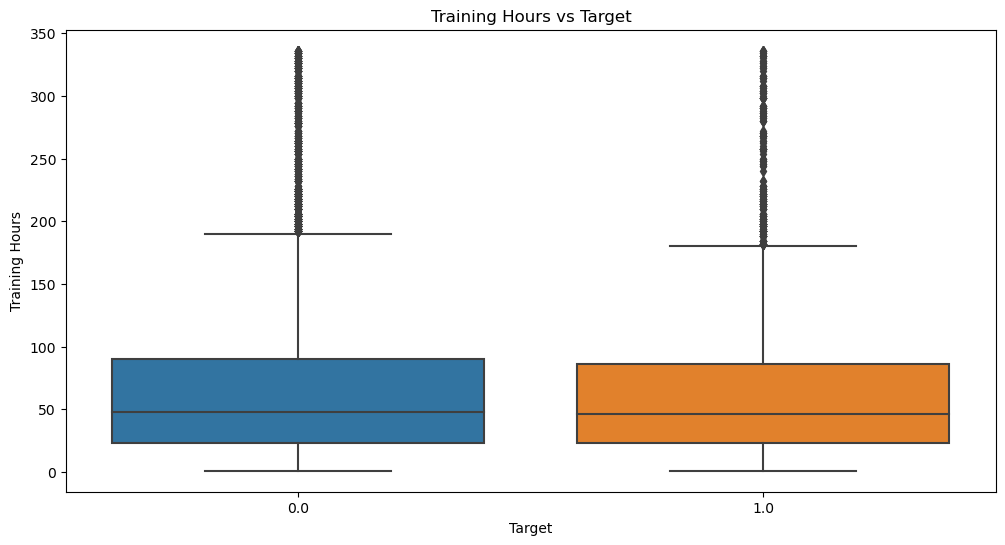

In [51]:
# Plot histogram for training hours
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='training_hours', kde=True, bins=30)
plt.title('Training Hours Distribution')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.show()

# Box plot to visualize relationship with target variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='target', y='training_hours')
plt.title('Training Hours vs Target')
plt.xlabel('Target')
plt.ylabel('Training Hours')
plt.show()

## Target Analysis

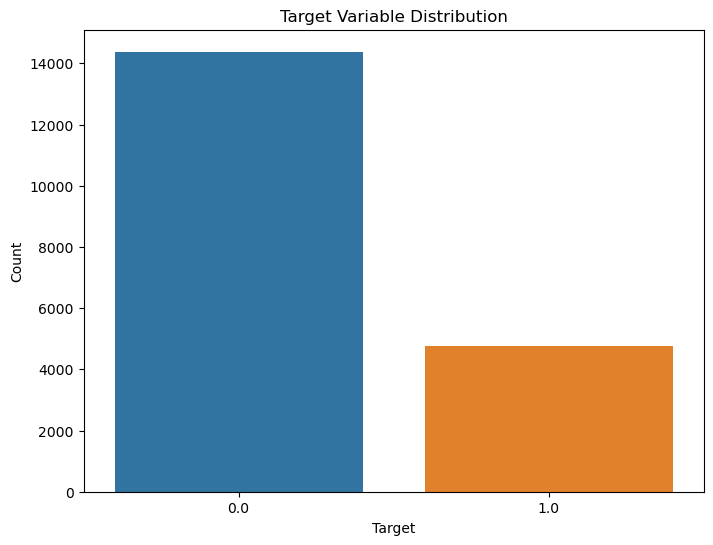

Target Variable Balance:
0.0    75.065247
1.0    24.934753
Name: target, dtype: float64


In [52]:
# Plot count plot for target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Calculate the balance of the target variable
target_balance = df['target'].value_counts(normalize=True) * 100

# Display the balance
print('Target Variable Balance:')
print(target_balance)

## City Development Index

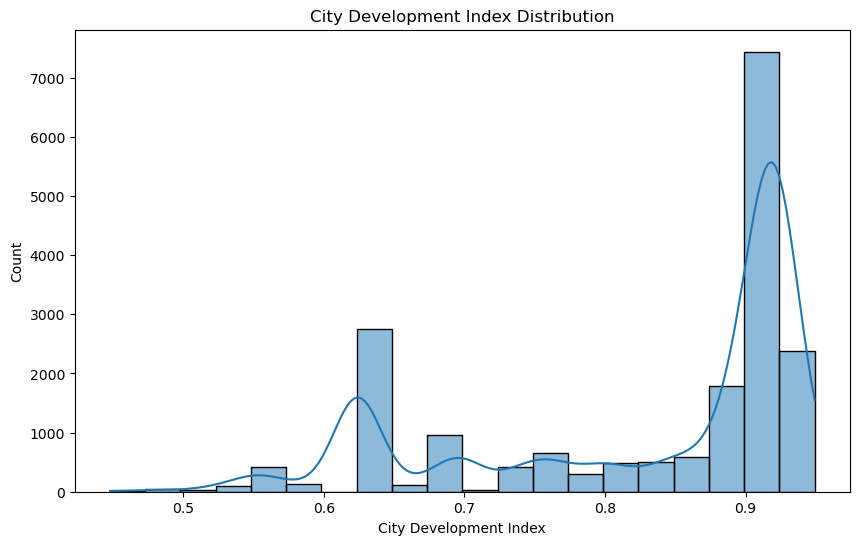

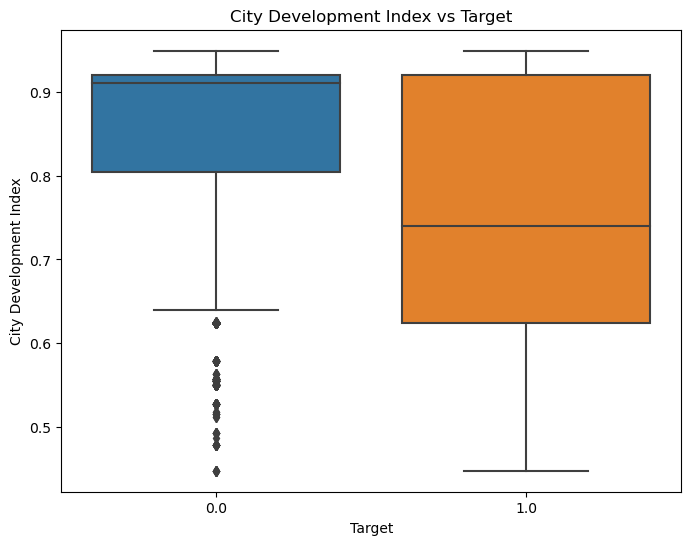

In [53]:
# Plot histogram for city_development_index
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='city_development_index', kde=True, bins=20)
plt.title('City Development Index Distribution')
plt.xlabel('City Development Index')
plt.ylabel('Count')
plt.show()

# Box plot to visualize relationship with target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='city_development_index')
plt.title('City Development Index vs Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.show()

# Hasil Observasi:
A. Tipe Data dan Nama Kolom:
Semua tipe data sudah sesuai.
Nama kolom sesuai dengan deskripsinya dan tidak ada yang aneh.

B. Kolom dengan Nilai Kosong:
Kolom 'gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', dan 'last_new_job' memiliki nilai kosong.

C. Nilai Summary yang Agak Aneh:
Tidak ada nilai summary yang terlihat aneh pada kolom numerik seperti min, mean, median, max. Pada kolom kategorikal, nilai unik, top, dan freq terlihat wajar.

Namun, untuk kolom dengan nilai kosong, perlu dilakukan tindakan selanjutnya seperti imputasi atau penghapusan nilai kosong, tergantung pada karakteristik data dan tujuan analisis. Selain itu, dalam proses preprocessing, perlu diperhatikan tindakan yang tepat untuk menangani kolom dengan nilai kosong.

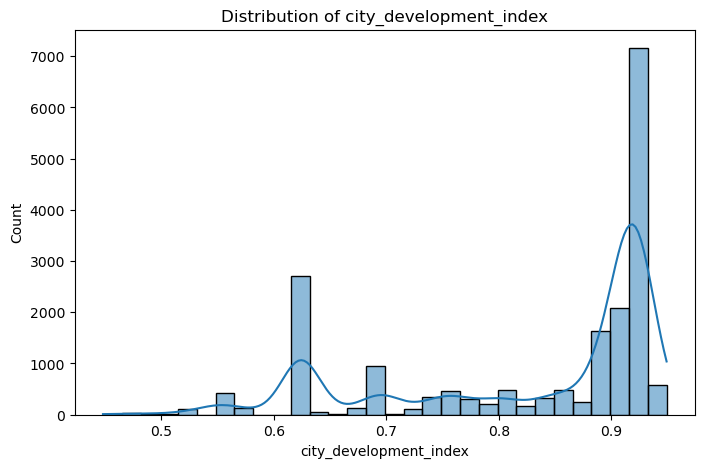

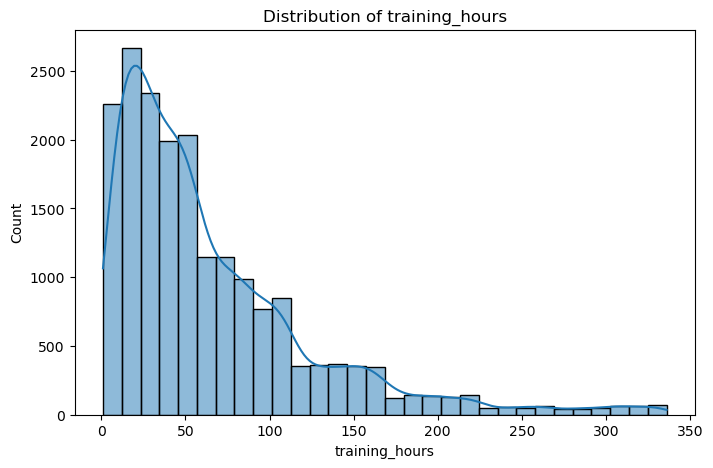

In [54]:
# Memilih kolom numerik
numeric_columns = ['city_development_index', 'training_hours']

# Plot histogram untuk setiap kolom numerik
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### city_development_index: Distribusi terlihat cukup normal (tidak skew), tetapi beberapa kota memiliki perkembangan indeks yang rendah.

#### training_hours: Distribusi memiliki sedikit skew ke kanan dengan sebagian besar pelatihan berlangsung kurang dari 100 jam.

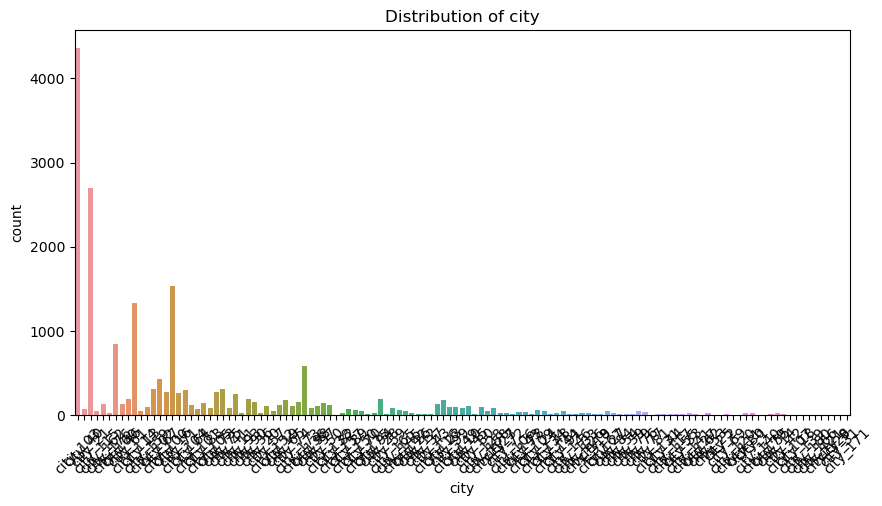

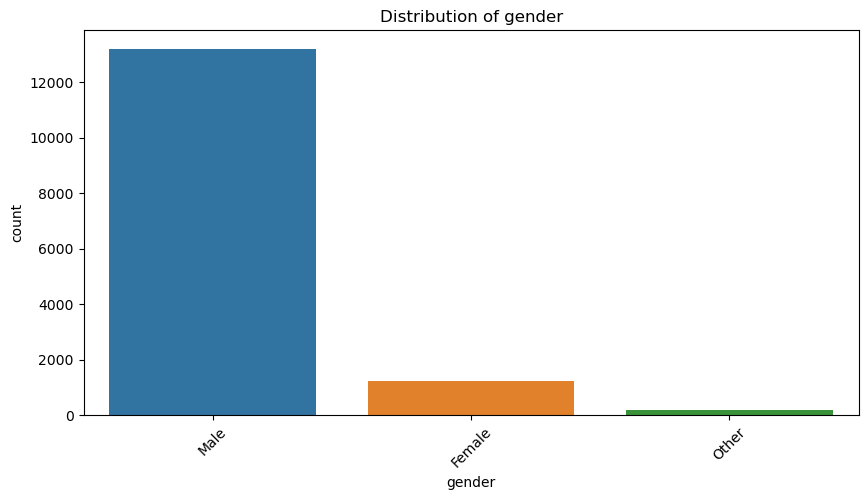

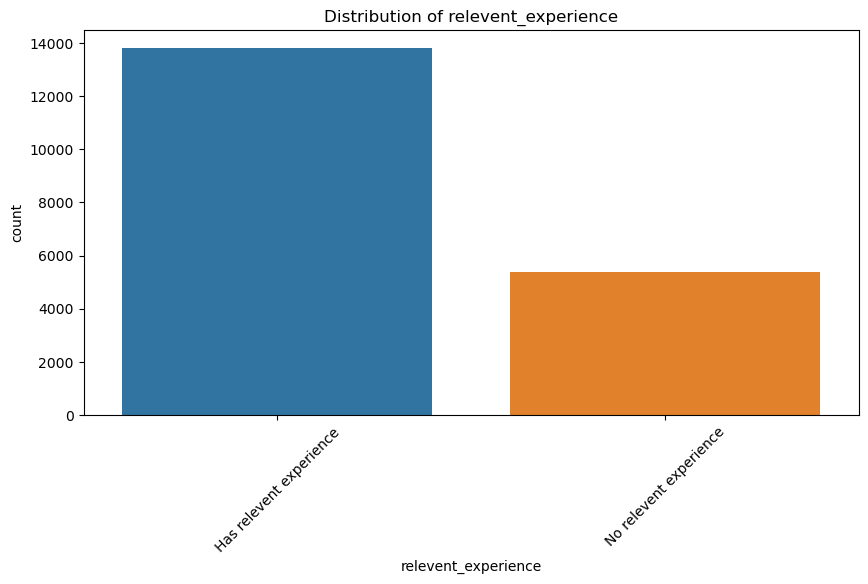

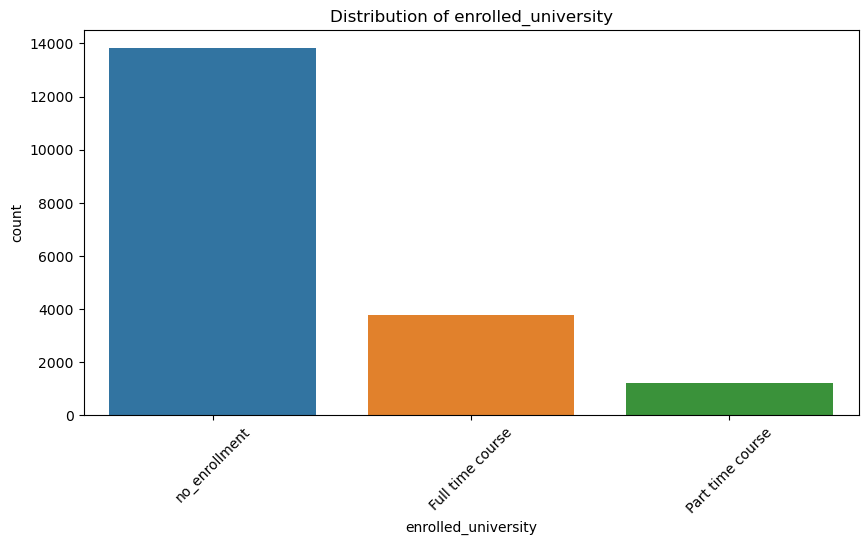

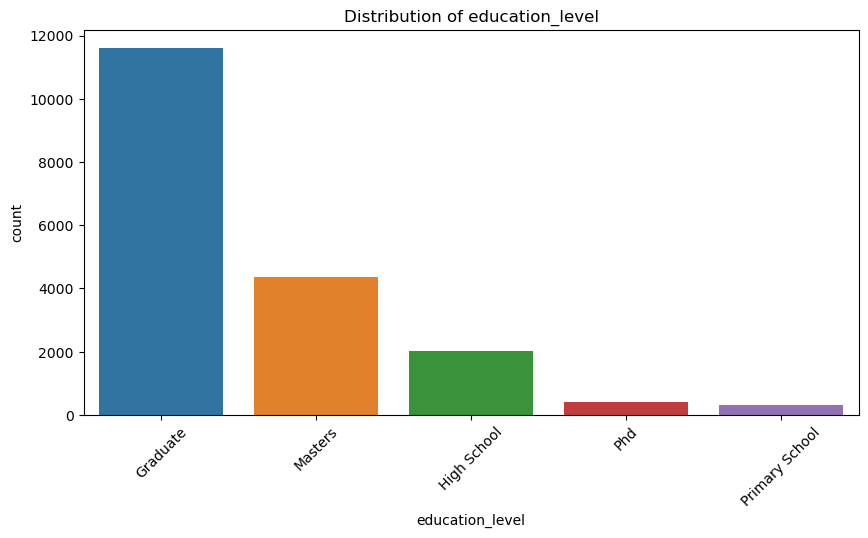

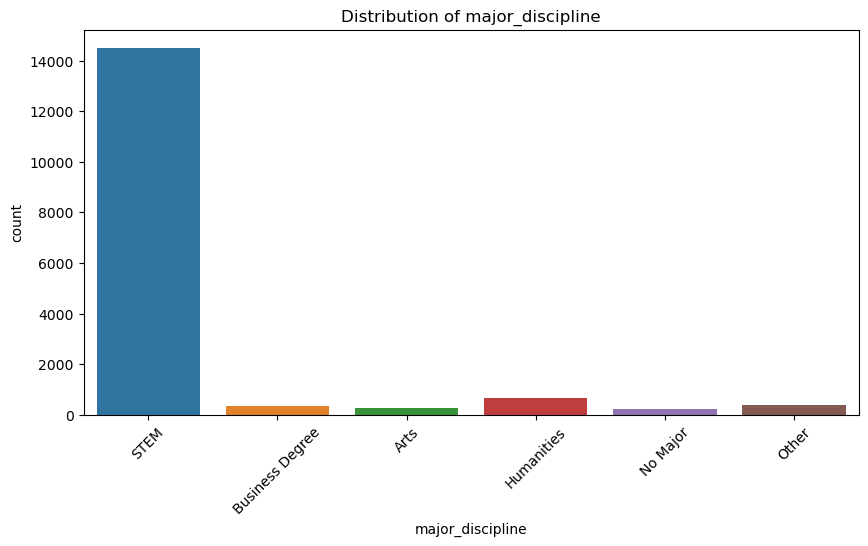

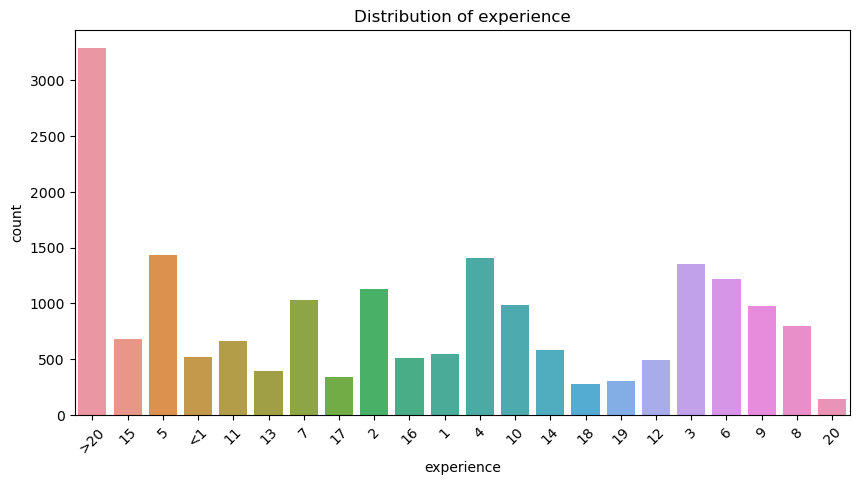

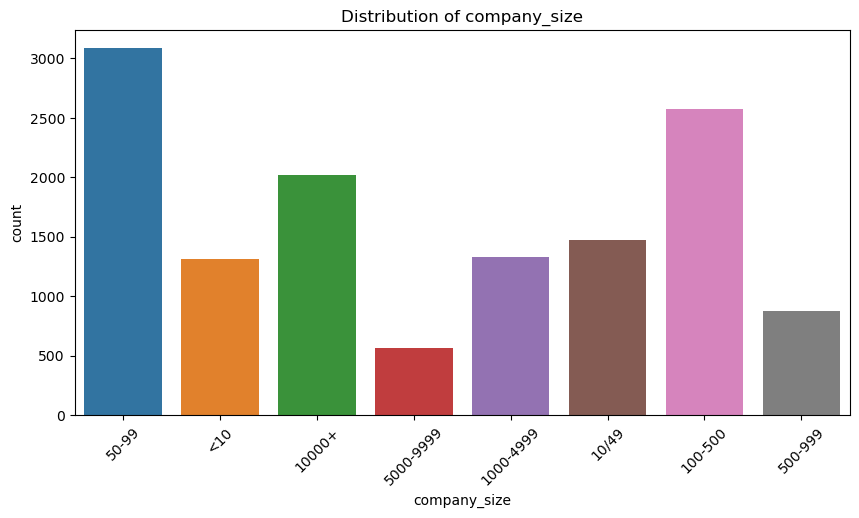

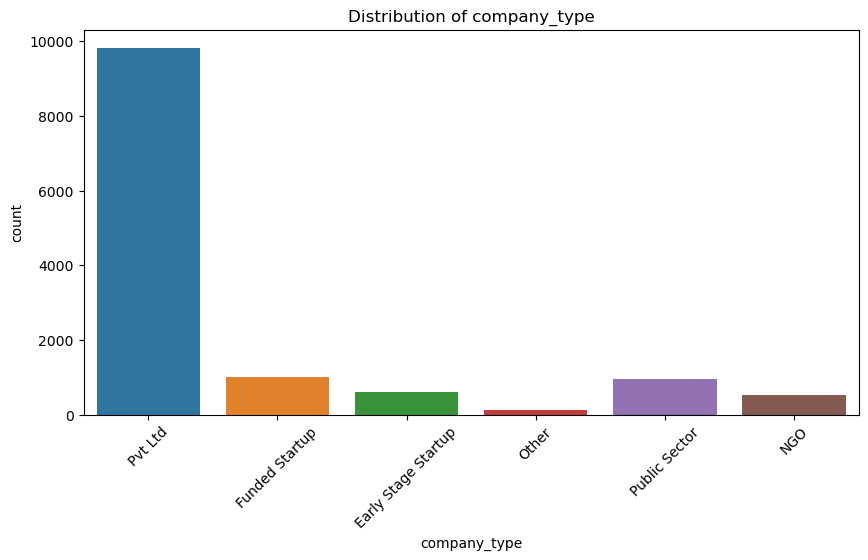

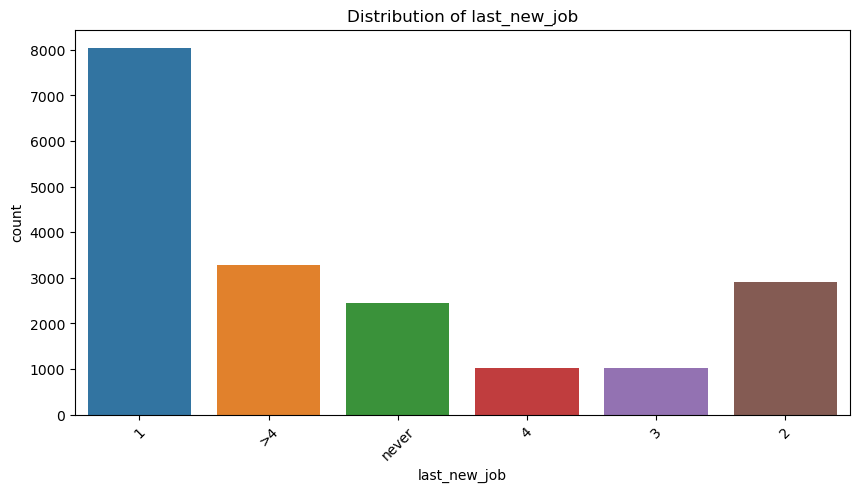

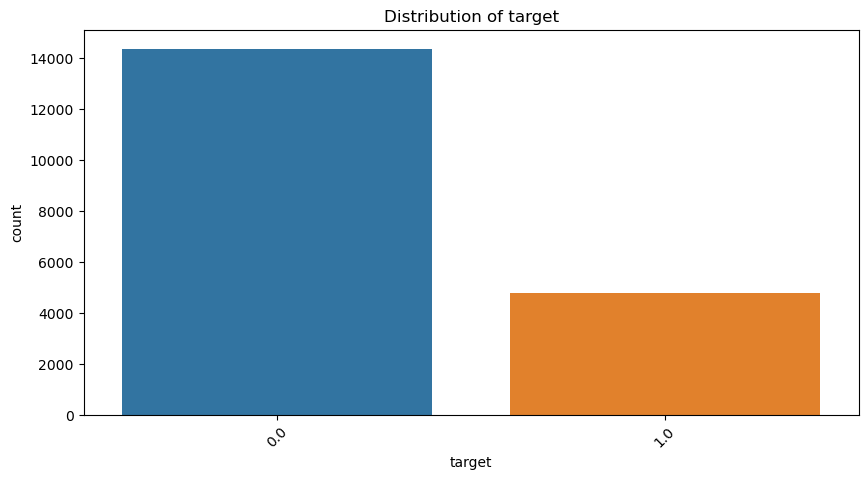

In [55]:
categorical_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
                       'education_level', 'major_discipline', 'experience', 'company_size', 
                       'company_type', 'last_new_job', 'target']

# Plot bar chart untuk setiap kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Hasil Observasi
#### city: Distribusi kota agak tidak merata, beberapa kota memiliki frekuensi yang tinggi.
#### gender: Terdapat kategori 'Other' yang mungkin perlu diperiksa lebih lanjut. Selain itu, perbedaan frekuensi antara jenis kelamin cukup besar.
#### relevent_experience: Mayoritas kandidat memiliki pengalaman relevan.
#### education_level: Kategori 'Primary School' memiliki frekuensi yang rendah dibandingkan dengan kategori lainnya.
#### major_discipline: Mayoritas kandidat memiliki disiplin mayor di bidang Engineering.
#### experience: Distribusi pengalaman terlihat wajar, namun ada beberapa nilai yang mungkin perlu diinspeksi lebih lanjut.
#### company_size: Kategori '50-99' dan '100-500' memiliki frekuensi tertinggi.
#### company_type: Mayoritas kandidat bekerja di perusahaan sektor Private.
#### last_new_job: Mayoritas kandidat telah mengganti pekerjaan dalam waktu kurang dari satu tahun.
#### target: Distribusi target tidak seimbang, dengan mayoritas kandidat tidak mencari perubahan pekerjaan.

# Follow-up data preprocessing yang dapat dilakukan meliputi:

#### Handling Missing Values: Perlu memeriksa dan mengatasi nilai yang hilang pada kolom dengan missing values seperti 'gender', 'enrolled_university', 'education_level', dsb.

#### Outlier Detection and Handling: Memeriksa apakah ada outlier pada variabel numerik dan mengambil tindakan yang sesuai jika ada.

#### Encoding Categorical Variables: Melakukan encoding pada variabel kategorikal untuk mengubahnya menjadi bentuk numerik yang dapat digunakan dalam pemodelan.

#### Balancing Target: Mengambil tindakan untuk menangani ketidakseimbangan dalam target (oversampling, undersampling, atau metode lainnya).

#### Feature Scaling: Melakukan normalisasi atau standardisasi pada variabel numerik jika dibutuhkan.

#### Feature Engineering: Mungkin ada kemungkinan untuk menggabungkan, memisahkan, atau mengubah fitur untuk meningkatkan kinerja model.

#### Validasi Data: Memastikan bahwa dataset telah divalidasi dengan benar untuk mengidentifikasi potensi masalah atau anomali lain yang perlu ditangani.